# T3.2 / N2 e Presença em aulas: 25, 26 e 27

In [2]:
import pandas as pd
import numpy as np

## 1 - Determine, para variável (Y):

### 1.1 -  A distribuição de frequência por classes;

In [14]:
# Recuperamos os dados
dados = pd.read_csv('./Dados semana 1 a 20 - Covid 2021 - Página1.csv')

In [15]:
# Vamos mostrar os primeiros 5 dados:
dados.head()

,Semana,Casos,Obitos
0,1,359593,6906
1,2,379061,6665
2,3,361195,7149
3,4,360721,7500
4,5,320820,7067


In [13]:
# Dividimos as classes => Raiz de Quantidade Total (N) para N >= 25
n = len(dados.Obitos)
k = sqrt(n) if n >= 25 else 5
print(f'Teremos {k} Classes.')

Teremos 5 Classes.


In [17]:
value = dados.Obitos.min()
classes = []
toAdd = (dados.Obitos.max() - dados.Obitos.min()) / k
while value <= dados.Obitos.max():
    classes.append((value, value + toAdd))
    value += toAdd
print('Classes retiradas', classes)

Classes retiradas [(6665, 9560.2), (9560.2, 12455.400000000001), (12455.400000000001, 15350.600000000002), (15350.600000000002, 18245.800000000003), (18245.800000000003, 21141.000000000004)]


In [20]:
# Item de classes
Y_freq = [] # (min, max, classes)
for min, max in classes:
    item_classe = dados.Obitos.loc[(dados.Obitos >= min) & (dados.Obitos < max)]
    Y_freq.append((min, max, item_classe.values))

In [40]:
freq_data = {'Classe':[], 'Itens': [], 'Frequencia_Absoluta': [], 'Frequencia_Relativa': []}
for min, max, items in Y_freq:
    freq_data['Classe'].append(f'[{int(min)}-{int(max)}[')
    freq_data['Itens'].append(items)
    freq_data['Frequencia_Absoluta'].append(len(items))
    freq_data['Frequencia_Relativa'].append((len(items) / len(dados.Obitos)) * 100)

    
print('A FrequÊncia da variável Y (óbitos) se dá por:')
freq_dataframe = pd.DataFrame(freq_data)
freq_dataframe

A FrequÊncia da variável Y (óbitos) se dá por:


,Classe,Itens,Frequencia_Absoluta,Frequencia_Relativa
0,[6665-9560[,"[6906, 6665, 7149, 7500, 7067, 7520, 7445, 8244]",8,40.0
1,[9560-12455[,[10104],1,5.0
2,[12455-15350[,"[12766, 14879, 13399, 13493]",4,20.0
3,[15350-18245[,"[15661, 17798, 17814, 16945]",4,20.0
4,[18245-21141[,"[19643, 21141, 20344]",3,15.0


###  1.2 - Os gráficos: Histograma e Polígono de Frequências simples;

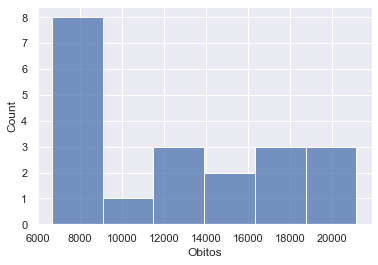

In [66]:
# Importar a biblioteca para desenho dos gráficos
import seaborn as srn
import matplotlib.pyplot as plt

srn.set(style="darkgrid")
srn_plot = srn.histplot(dados.Obitos)
plt.plot(freq_dataframe.Classe, freq_dataframe.Frequencia_Absoluta)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)


<BarContainer object of 5 artists>

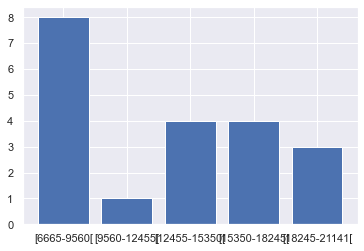

In [74]:
import matplotlib.pyplot as plt
f = plt.subplots?
print(f)
plt.bar(freq_dataframe.Classe, freq_dataframe.Frequencia_Absoluta)